In [1]:
%matplotlib inline

In [2]:
import aldegonde
import requests
import matplotlib.pyplot as plt
from collections import Counter

from aldegonde.structures.alphabet import UPPERCASE_ALPHABET
from aldegonde.structures import cicada3301
from aldegonde.structures.sequence import Sequence

from aldegonde.algorithm.autokey import ciphertext_autokey_vigenere_encrypt
from aldegonde.algorithm.autokey import plaintext_autokey_vigenere_encrypt

from aldegonde.algorithm.autokey import ciphertext_autokey_beaufort_encrypt
from aldegonde.algorithm.autokey import plaintext_autokey_beaufort_encrypt

from aldegonde.algorithm.autokey import ciphertext_autokey_variant_beaufort_encrypt
from aldegonde.algorithm.autokey import plaintext_autokey_variant_beaufort_encrypt

from aldegonde.stats.doublets import print_doublets_statistics
from aldegonde.stats.dist import dist

from aldegonde.grams.bigram_diagram import print_bigram_diagram, bigram_diagram

In [3]:
ALICE_URL="https://gist.githubusercontent.com/phillipj/4944029/raw/75ba2243dd5ec2875f629bf5d79f6c1e4b5a8b46/alice_in_wonderland.txt"
alicetxt = str(requests.get(ALICE_URL).content.upper())
with open("liber-primus__transcription--master.txt") as fd:
    lp = fd.read()

liberprimus = Sequence(text=lp, alphabet=cicada3301.CICADA_ALPHABET)
primer = Sequence(data=[0], alphabet=cicada3301.CICADA_ALPHABET)

skipped characters {'\n', '6', 'Q', 's', '.', '/', 'N', 'O', 'l', '-', 'j', '%', 'W', 'U', 'm', 'Y', 'g', 'n', 'c', '4', 'F', '0', 'K', '&', 'A', 'v', 'r', 'h', 'G', 'S', 'e', 'k', '3', 'p', 'd', 'E', 'q', 'b', 'D', '§', 'P', '7', 'Z', 'B', 'C', 'a', '9', 't', 'M', '2', 'u', '5', 'H', 'V', 'J', '8', 'R', 'T', 'I', 'f', '$', 'i', 'w', 'o', 'X', 'x', 'L', '1'}


In [9]:
def michel_pyplot_bigram(runes: Sequence, title: str = "Bigram Plot") -> None:
    """
    print bigram distribution using pyplot
    """
    bg = bigram_diagram(runes)
    plt.rcParams['font.family'] = "sans-serif" #"Segoe UI Historic"
    plt.rcParams['font.sans-serif'] = "Verdana"

    fig, ax = plt.subplots()
    fig.set_dpi(300)
    plt.rcParams['figure.figsize'] = [20, 20]
    plt.title(title)
    
    ax.matshow(bg, cmap=plt.cm.Blues)
    sx = ax.secondary_xaxis('bottom')
    sy = ax.secondary_yaxis('right')
    ax.set_xticks(range(0,len(runes.alphabet)))
    ax.set_yticks(range(0,len(runes.alphabet)))
    sx.set_xticks(range(0,len(runes.alphabet)))
    sy.set_yticks(range(0,len(runes.alphabet)))
    sx.set_xticklabels(runes.alphabet.alphabet)
    sy.set_yticklabels(runes.alphabet.alphabet)
 
    for i in range(0, len(runes.alphabet)):
        for j in range(0, len(runes.alphabet)):
            c = bg[j][i]
            ax.text(i, j, str(c), va='center', ha='center', fontsize=15)    
    
    plt.show()

In [10]:
cav = ciphertext_autokey_vigenere_encrypt(alice, primer)
cab = ciphertext_autokey_beaufort_encrypt(alice, primer)
cavb = ciphertext_autokey_variant_beaufort_encrypt(alice, primer)

pav = plaintext_autokey_vigenere_encrypt(alice, primer)
pab = plaintext_autokey_beaufort_encrypt(alice, primer)
avb = plaintext_autokey_variant_beaufort_encrypt(alice, primer)

NameError: name 'alice' is not defined

/Users/mich/src/stethoscope/.direnv/python-3.9.12/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 5792 (\N{RUNIC LETTER FEHU FEOH FE F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mich/src/stethoscope/.direnv/python-3.9.12/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 5794 (\N{RUNIC LETTER URUZ UR U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mich/src/stethoscope/.direnv/python-3.9.12/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 5798 (\N{RUNIC LETTER THURISAZ THURS THORN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mich/src/stethoscope/.direnv/python-3.9.12/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 5801 (\N{RUNIC LETTER OS O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mich/src/stethoscope/.direnv/python-3.9.12/lib/python3

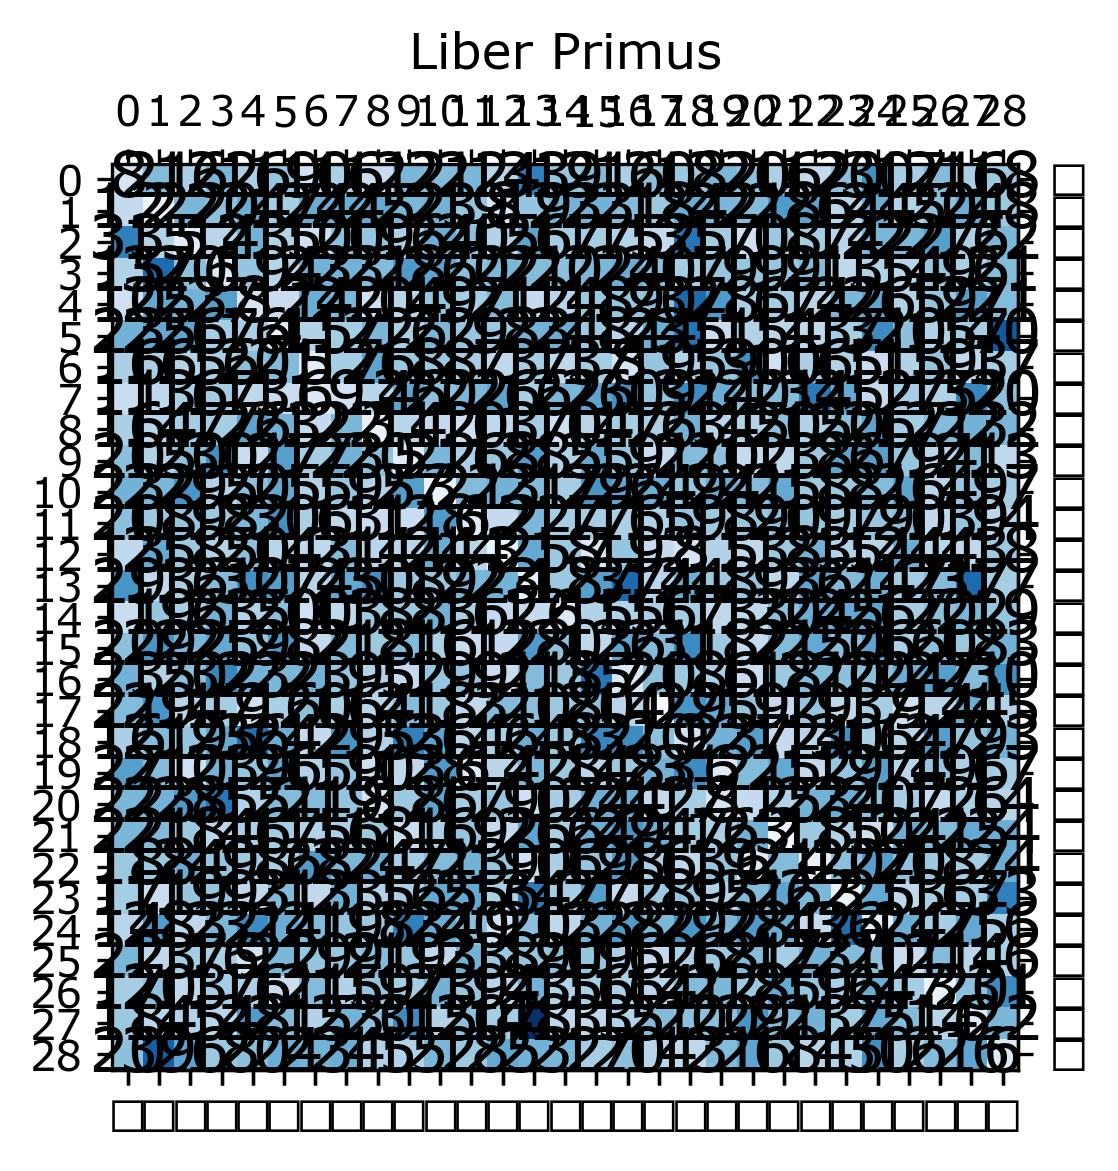

In [6]:
michel_pyplot_bigram(liberprimus, "Liber Primus")

In [8]:
michel_pyplot_bigram(cak, "Ciphertext Autokey Alice in Wonderland")

NameError: name 'cak' is not defined